In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp
import seaborn as sns

In [22]:
# Load data
data = pd.read_csv("application_train.csv")
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Missing Value
print(data.isnull().sum())

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64


In [24]:
# Basic preprocessing
data = data.dropna(axis=1, thresh=0.7*len(data))  # Drop columns with >30% missing values
numeric = data.select_dtypes(include=[np.number])
data[numeric.columns] = numeric.fillna(numeric.median())
data = data.dropna()  # Drop remaining missing values
data.isnull().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 72, dtype: int64

In [25]:
data.drop(columns='SK_ID_CURR', inplace=True)
# One-hot encode all categorical columns
data = pd.get_dummies(data, drop_first=True)

In [26]:

# Define features and target
x = data.drop("TARGET", axis=1)
y = data["TARGET"] 
data

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,False,False,False,False,False,False,False,False,False,False
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,False,False,False,False,False,False,False,False,False,False
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,False,False,False,False,False,False,False,False,False,False
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,False,False,False,False,False,False,False,False,False,False
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,157500.0,254700.0,27558.0,225000.0,0.032561,-9327,-236,-8456.0,...,False,False,False,False,False,False,False,False,False,False
307507,0,0,72000.0,269550.0,12001.5,225000.0,0.025164,-20775,365243,-4388.0,...,False,False,False,False,False,False,False,False,False,True
307508,0,0,153000.0,677664.0,29979.0,585000.0,0.005002,-14966,-7921,-6737.0,...,False,False,False,False,False,False,False,False,False,False
307509,1,0,171000.0,370107.0,20205.0,319500.0,0.005313,-11961,-4786,-2562.0,...,False,False,False,False,False,False,False,False,False,False


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve

In [28]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [29]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [31]:
probs = model.predict_proba(X_test_scaled)[:, 1]

# Define cost values
cost_fp = 1000  # False Positive cost (non-defaulter predicted as defaulter)
cost_fn = 5000  # False Negative cost (defaulter missed)

In [32]:
# Find optimal threshold
thresholds = np.arange(0.1, 0.9, 0.01)
min_cost = float('inf')
optimal_threshold = 0

for thres in thresholds:
    preds = (probs >= thres).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    cost = fp * cost_fp + fn * cost_fn
    if cost < min_cost:
        min_cost = cost
        optimal_threshold = thres



In [33]:
# Final predictions with optimal threshold
final_pred = (probs >= optimal_threshold).astype(int)
con_matrix = confusion_matrix(y_test, final_pred)
report = classification_report(y_test, final_pred)

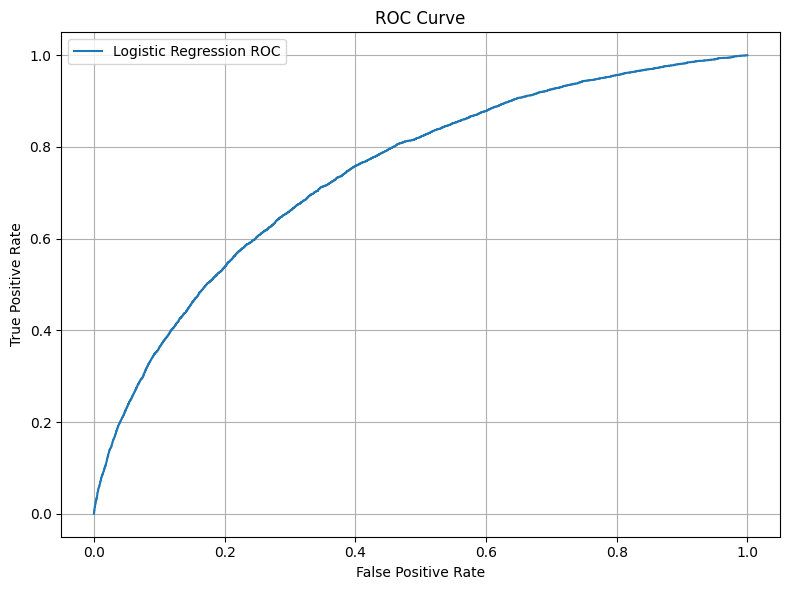

In [45]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, probs)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression ROC')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [36]:
# Results
print(f"Optimal Threshold: {optimal_threshold:.2f}")
print("Confusion Matrix:")
print(con_matrix)
print("\nClassification Report:")
print(report)
print(f"Minimum Business Cost: ${min_cost:,}")

Optimal Threshold: 0.17
Confusion Matrix:
[[51494  4737]
 [ 3366  1647]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     56231
           1       0.26      0.33      0.29      5013

    accuracy                           0.87     61244
   macro avg       0.60      0.62      0.61     61244
weighted avg       0.88      0.87      0.87     61244

Minimum Business Cost: $21,567,000


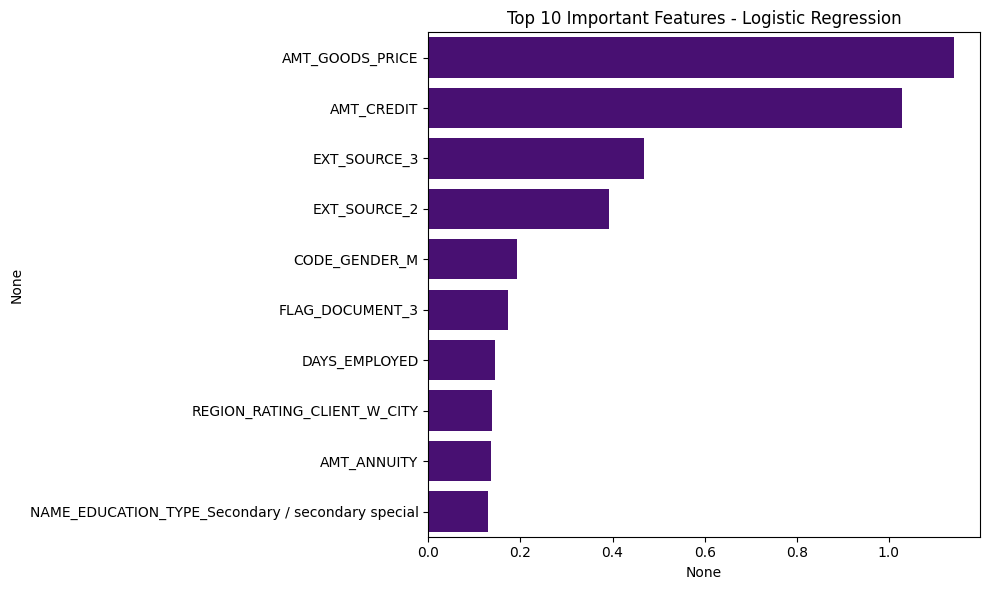

In [43]:
# Feature Importance
feature_importances = pd.Series(np.abs(model.coef_[0]), index=x.columns)
top_features = feature_importances.sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_features, y=top_features.index,color='indigo')
plt.title("Top 10 Important Features - Logistic Regression")
plt.tight_layout()
plt.show()

## Conclusion:
- Developed a loan default prediction model using Logistic Regression and Random Forest.
- Evaluated models using accuracy, precision, recall, F1-score, and ROC-AUC.
- Applied business profit/loss logic to optimize lending decisions.
- Implemented threshold tuning to maximize expected profit and reduce loan default risk.